RESULTADOS
----------
Estadístico t: -4.2233
Grados de libertad: 5
p-valor: 0.0042

CONCLUSIÓN
----------
✅ Se RECHAZA H0. Hay evidencia significativa contra H0.


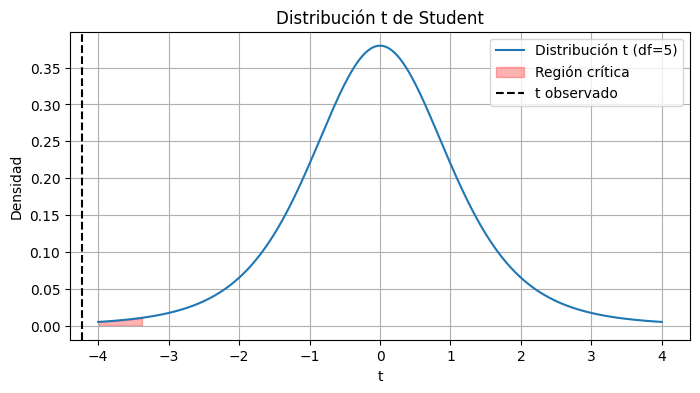

FloatText(value=7750.0, description='Media muestral:')

IntText(value=6, description='Tamaño (n):')

FloatText(value=145.0, description='Desv. estándar:')

FloatText(value=8000.0, description='Media H0:')

FloatText(value=0.01, description='Alfa:')

RadioButtons(description='Tipo de prueba:', index=1, options=('Dos colas', 'Cola inferior', 'Cola superior'), …

Button(description='Calcular prueba t', style=ButtonStyle())

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# -----------------------------
# Widgets de entrada
# -----------------------------
media_muestral = widgets.FloatText(description="Media muestral:")
n_muestra = widgets.IntText(description="Tamaño (n):")
desv_estandar = widgets.FloatText(description="Desv. estándar:")
media_hipotetica = widgets.FloatText(description="Media H0:")
alpha = widgets.FloatText(value=0.05, description="Alfa:")
tipo_prueba = widgets.RadioButtons(
    options=["Dos colas", "Cola inferior", "Cola superior"],
    description="Tipo de prueba:"
)
calcular_btn = widgets.Button(description="Calcular prueba t")

# -----------------------------
# Función principal
# -----------------------------
def ejecutar_prueba(b):
    clear_output()

    # Obtener valores
    x_bar = media_muestral.value
    n = n_muestra.value
    s = desv_estandar.value
    mu0 = media_hipotetica.value
    a = alpha.value
    tipo = tipo_prueba.value

    # Cálculos
    se = s / np.sqrt(n)
    t_stat = (x_bar - mu0) / se
    df = n - 1

    # Calcular p-valor según tipo de prueba
    if tipo == "Dos colas":
        p_valor = stats.t.sf(np.abs(t_stat), df) * 2
    elif tipo == "Cola inferior":
        p_valor = stats.t.cdf(t_stat, df)
    elif tipo == "Cola superior":
        p_valor = stats.t.sf(t_stat, df)

    # Mostrar resultados
    print("RESULTADOS")
    print("----------")
    print(f"Estadístico t: {t_stat:.4f}")
    print(f"Grados de libertad: {df}")
    print(f"p-valor: {p_valor:.4f}")

    # Conclusión
    print("\nCONCLUSIÓN")
    print("----------")
    if p_valor < a:
        print("✅ Se RECHAZA H0. Hay evidencia significativa contra H0.")
    else:
        print("🟡 No se rechaza H0. No hay evidencia suficiente para rechazarla.")

    # -----------------------------
    # Gráfico
    # -----------------------------
    x = np.linspace(-4, 4, 400)
    y = stats.t.pdf(x, df)

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label=f"Distribución t (df={df})")
    plt.title("Distribución t de Student")

    # Sombrear regiones críticas
    if tipo == "Dos colas":
        t_crit = stats.t.ppf(1 - a / 2, df)
        plt.fill_between(x, y, where=(x <= -t_crit) | (x >= t_crit), color="red", alpha=0.3, label="Región crítica")
    elif tipo == "Cola inferior":
        t_crit = stats.t.ppf(a, df)
        plt.fill_between(x, y, where=(x <= t_crit), color="red", alpha=0.3, label="Región crítica")
    elif tipo == "Cola superior":
        t_crit = stats.t.ppf(1 - a, df)
        plt.fill_between(x, y, where=(x >= t_crit), color="red", alpha=0.3, label="Región crítica")

    # Línea para el t observado
    plt.axvline(t_stat, color="black", linestyle="--", label="t observado")
    plt.legend()
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("Densidad")
    plt.show()

    # Re-mostrar los widgets debajo del resultado
    display(media_muestral, n_muestra, desv_estandar, media_hipotetica, alpha, tipo_prueba, calcular_btn)

# Enlazar botón
calcular_btn.on_click(ejecutar_prueba)

# Mostrar interfaz
display(media_muestral, n_muestra, desv_estandar, media_hipotetica, alpha, tipo_prueba, calcular_btn)
